<a href="https://colab.research.google.com/github/Evin-Ngoa/Auto-GPT/blob/master/Facial_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Import the relevant packages and collect all the necessary dependencies.
- TensorFlow/Keras: For building and training the CNN, implementing layers like convolutional, pooling, dropout, and fully connected layers.
- NumPy: For handling numerical operations and manipulating image data (since images are stored as NumPy arrays).
- OpenCV: For reading and processing the .pgm image files.
- Matplotlib: For visualizing the results (accuracy and loss plots).
- Scikit-learn (sklearn): For splitting the dataset into training, validation, and test sets, and preprocessing labels.
- Pillow (optional): This can be used for image manipulation and transformations if needed.

In [1]:
!pip install tensorflow
!pip install numpy
!pip install opencv-python
!pip install matplotlib
!pip install scikit-learn
!pip install pillow


In [2]:
# Import necessary libraries for image processing and model building
import os
# NumPy for array operations
import numpy as np

# OpenCV for reading .pgm images
import cv2

# Matplotlib for plotting training and validation accuracy/loss
import matplotlib.pyplot as plt

# TensorFlow and Keras for building the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Transfer Learning (Optional: for VGG16 or other pre-trained models)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Scikit-learn for splitting the dataset and encoding labels
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



## Step 2. Upload and import the data.

In [3]:
# unzip the uploaded file
!unzip data-faces.zip -d data-faces


Archive:  data-faces.zip
  inflating: data-faces/README       
  inflating: data-faces/s1/1.pgm     
  inflating: data-faces/s1/10.pgm    
  inflating: data-faces/s1/2.pgm     
  inflating: data-faces/s1/3.pgm     
  inflating: data-faces/s1/4.pgm     
  inflating: data-faces/s1/5.pgm     
  inflating: data-faces/s1/6.pgm     
  inflating: data-faces/s1/7.pgm     
  inflating: data-faces/s1/8.pgm     
  inflating: data-faces/s1/9.pgm     
  inflating: data-faces/s10/1.pgm    
  inflating: data-faces/s10/10.pgm   
  inflating: data-faces/s10/2.pgm    
  inflating: data-faces/s10/3.pgm    
  inflating: data-faces/s10/4.pgm    
  inflating: data-faces/s10/5.pgm    
  inflating: data-faces/s10/6.pgm    
  inflating: data-faces/s10/7.pgm    
  inflating: data-faces/s10/8.pgm    
  inflating: data-faces/s10/9.pgm    
  inflating: data-faces/s11/1.pgm    
  inflating: data-faces/s11/10.pgm   
  inflating: data-faces/s11/2.pgm    
  inflating: data-faces/s11/3.pgm    
  inflating: data-faces/s

#### A function to load the images: Loading the .pgm files, normalize them, and store them in NumPy arrays for model processing. Here's the code to do that:

In [8]:
# Function to load images from dataset
def load_images(folder_path):
    images = []
    labels = []
    # Loop through each subject folder (s1 to s40)
    for subject in range(1, 41):  # There are 40 subjects in the dataset
        subject_folder = os.path.join(folder_path, f's{subject}')
        for img_num in range(1, 11):  # Each subject has 10 images (1.pgm to 10.pgm)
            img_path = os.path.join(subject_folder, f'{img_num}.pgm')
            # Load the image in grayscale mode
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                # Normalize the image (scale pixel values to [0, 1])
                img = img / 255.0
                images.append(img)
                labels.append(subject - 1)  # Use subject index as label (0 to 39)
                print(f'Loaded image {img_num}.pgm from {subject_folder} with label: {subject - 1}')

    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels


# Path to the folder where the dataset is stored
folder_path = 'data-faces'  # Make sure the path is correct in Colab

# Load the images and labels
images, labels = load_images(folder_path)

# Print some details to verify
print(f'Loaded {images.shape[0]} images.')
print(f'Image shape: {images.shape[1:]} (Height x Width)')
print(f'Labels shape: {labels.shape}')
# Check if labels are correctly assigned
print("First 20 labels:", labels[:20])


Loaded image 1.pgm from data-faces/s1 with label: 0
Loaded image 2.pgm from data-faces/s1 with label: 0
Loaded image 3.pgm from data-faces/s1 with label: 0
Loaded image 4.pgm from data-faces/s1 with label: 0
Loaded image 5.pgm from data-faces/s1 with label: 0
Loaded image 6.pgm from data-faces/s1 with label: 0
Loaded image 7.pgm from data-faces/s1 with label: 0
Loaded image 8.pgm from data-faces/s1 with label: 0
Loaded image 9.pgm from data-faces/s1 with label: 0
Loaded image 10.pgm from data-faces/s1 with label: 0
Loaded image 1.pgm from data-faces/s2 with label: 1
Loaded image 2.pgm from data-faces/s2 with label: 1
Loaded image 3.pgm from data-faces/s2 with label: 1
Loaded image 4.pgm from data-faces/s2 with label: 1
Loaded image 5.pgm from data-faces/s2 with label: 1
Loaded image 6.pgm from data-faces/s2 with label: 1
Loaded image 7.pgm from data-faces/s2 with label: 1
Loaded image 8.pgm from data-faces/s2 with label: 1
Loaded image 9.pgm from data-faces/s2 with label: 1
Loaded imag

## Step 3. View a few images to get a sense of the data.



First 10 labels:  [0 0 0 0 0 0 0 0 0 0]


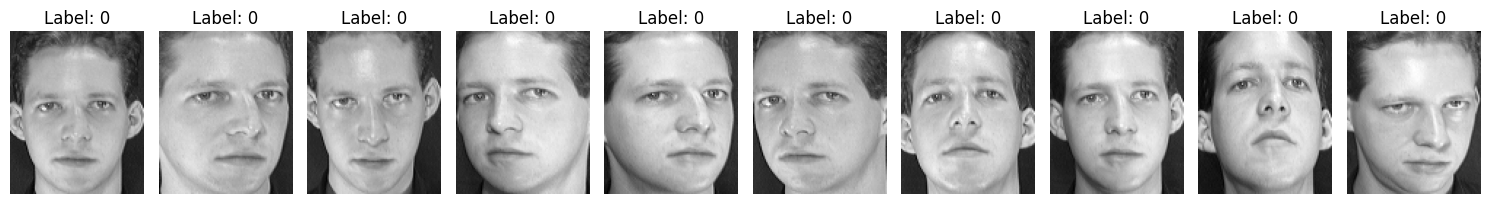

In [9]:
# Display a few images to get a sense of the data
plt.figure(figsize=(15, 5))  # Set the size of the figure

# Print the first 10 labels to verify
print("First 10 labels: ", labels[:10])

for i in range(10):  # Display the first 10 images
    plt.subplot(1, 10, i+1)  # Create a subplot with 1 row and 10 columns
    plt.imshow(images[i], cmap='gray')  # Display the image in grayscale
    plt.title(f'Label: {labels[i]}')  # Show the corresponding label as the title
    plt.axis('off')  # Turn off the axis
plt.tight_layout()  # Adjust layout for better spacing between images
plt.show()


2nd 10 labels:  [1 1 1 1 1 1 1 1 1 1]


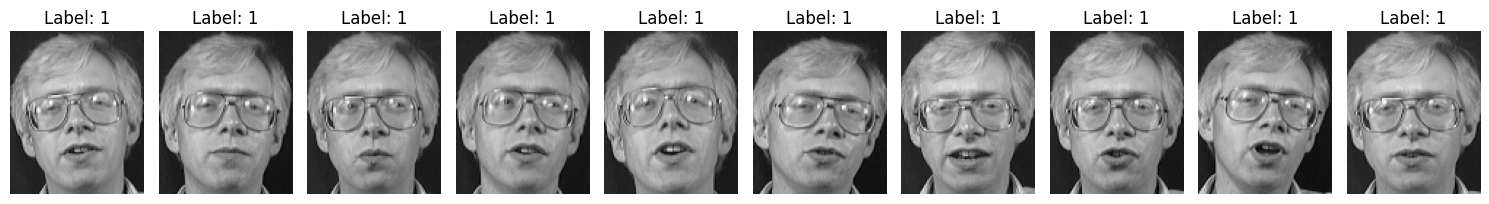

In [10]:
# Display a few images to get a sense of the data
plt.figure(figsize=(15, 5))  # Set the size of the figure

# Print the first 10 labels to verify
print("2nd 10 labels: ", labels[10:20])

for i in range(10):  # Display the first 10 images
    plt.subplot(2, 10, i+10+1)  # Create a subplot with 1 row and 10 columns
    plt.imshow(images[i+10], cmap='gray')  # Display the image in grayscale
    plt.title(f'Label: {labels[i+10]}')  # Show the corresponding label as the title
    plt.axis('off')  # Turn off the axis
plt.tight_layout()  # Adjust layout for better spacing between images
plt.show()


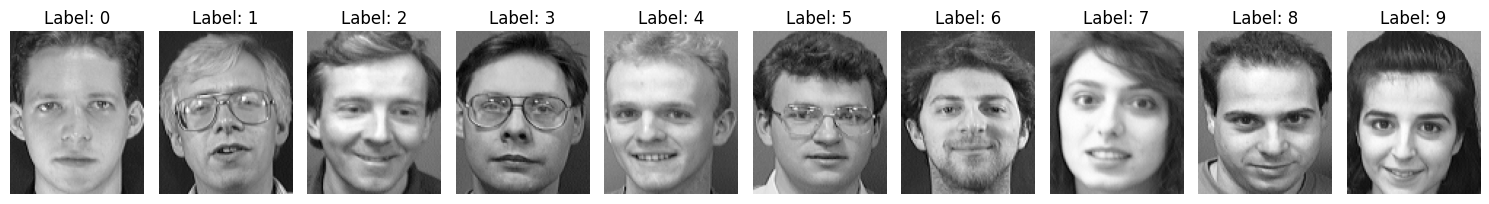

In [11]:
# Display the first image of the first 10 subjects to get a sense of the data
plt.figure(figsize=(15, 5))  # Set the size of the figure
for i in range(10):  # Display the first image from each of the first 10 subjects
    plt.subplot(1, 10, i+1)  # Create a subplot with 1 row and 10 columns
    plt.imshow(images[i*10], cmap='gray')  # Display the first image from each subject
    plt.title(f'Label: {labels[i*10]}')  # Show the corresponding label as the title
    plt.axis('off')  # Turn off the axis
plt.tight_layout()  # Adjust layout for better spacing between images
plt.show()

## Step 4: Create a validation framework and split the data into train, test, and validation datasets, we need to divide the dataset into three parts:
- **Training set:** Used to train the model.
- **Validation set**: Used to tune hyperparameters and evaluate the model during training.
- **Test set:** Used to evaluate the final performance of the model after training is complete.

### Code to Split the Data
- The split is 60% for training, 20% for validation, and 20% for testing. I will use train_test_split from sklearn to do this in two stages: first to split into training + temp (test + validation), and then split the temp set into test and validation sets.

In [12]:
from sklearn.model_selection import train_test_split

# Step 1: I split into training set (60%) and a temp set (40% for test + validation)
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.4, random_state=42, stratify=labels)

# Step 2: I split the temp set into validation set (20%) and test set (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print shapes of the datasets to confirm
print(f"Training set size: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation set size: {X_val.shape}, Labels: {y_val.shape}")
print(f"Test set size: {X_test.shape}, Labels: {y_test.shape}")


Training set size: (240, 112, 92), Labels: (240,)
Validation set size: (80, 112, 92), Labels: (80,)
Test set size: (80, 112, 92), Labels: (80,)


## Step 5: Perform necessary transformations to prepare the data for input to the CNN model.
- Preparing the data for input into a CNN model, I performed the following transformations to ensure that the data is in a proper format for training a CNN.

In [13]:
from tensorflow.keras.utils import to_categorical

# Step 1: Reshape the images to add a channel dimension (since these are grayscale images)
# Current shape is (num_samples, 112, 92), we need (num_samples, 112, 92, 1) for CNN
X_train = X_train.reshape(X_train.shape[0], 112, 92, 1)
X_val = X_val.reshape(X_val.shape[0], 112, 92, 1)
X_test = X_test.reshape(X_test.shape[0], 112, 92, 1)

# Step 2: Convert labels to one-hot encoding (for 40 subjects)
y_train = to_categorical(y_train, num_classes=40)
y_val = to_categorical(y_val, num_classes=40)
y_test = to_categorical(y_test, num_classes=40)

# Step 3: Confirm the shapes of the datasets
print(f"Training set shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, Labels: {y_val.shape}")
print(f"Test set shape: {X_test.shape}, Labels: {y_test.shape}")


Training set shape: (240, 112, 92, 1), Labels: (240, 40)
Validation set shape: (80, 112, 92, 1), Labels: (80, 40)
Test set shape: (80, 112, 92, 1), Labels: (80, 40)



### Steps I took to transform the data:
- Reshaped the images: CNNs expect input data to have a specific shape, typically (height, width, channels). Since the images are grayscale, I added an additional dimension to represent the channel (which will be 1 for grayscale).

- Converted the labels to categorical format: Since we are dealing with multi-class classification (40 subjects), I converted the labels into one-hot encoded format using to_categorical() from tensorflow.keras.utils.

- I Checked the final shapes of the data: After transformations, we'll confirm the shapes of the datasets to ensure they match the CNN's expected input format.

## Step 6:Build a CNN model with three main layers: a convolutional layer, a pooling layer, and a fully connected layer. You can also consider utilizing state-of-the-art architectures using transfer learning.

I will construct a simple CNN architecture with the following layers:

- Convolutional Layer: Detects features from the images such as edges, textures, and shapes.
- Pooling Layer: Reduces the spatial dimensions of the image (downsampling) to make the computation more efficient while retaining important features.
- Fully Connected Layer: Connects the output from the convolutional and pooling layers to produce final classifications.

### A basic CNN model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential()

# 1st Convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(112, 92, 1)))

# 1st MaxPooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional layer with 64 filters
model.add(Conv2D(64, (3, 3), activation='relu'))

# 2nd MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps before passing them to the dense layers
model.add(Flatten())

# Fully connected (dense) layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Output layer with 40 units (one for each class) and softmax activation for multi-class classification
model.add(Dense(40, activation='softmax'))

# Compile the model with categorical crossentropy loss and the Adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 110, 90, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 55, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 53, 43, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 26, 21, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 34944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,472,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 40)                  │           5,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,496,936 (17.15 MB)

 Trainable params: 4,496,936 (17.15 MB)

 Non-trainable params: 0 (0.00 B)

Below is an optional approach to using transfer learning with a pre-trained state-of-the-art architecture such as VGG16 for better performance, especially on small datasets like this one.

In [15]:
# Here I implemented transfer learning using VGG16

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load the VGG16 model with pre-trained weights (excluding the top classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(112, 92, 3))

# Freeze the layers of the base model so their weights won't be updated during training
for layer in base_model.layers:
    layer.trainable = False

# Build a new model on top of VGG16
input_tensor = Input(shape=(112, 92, 1))

# Replicate grayscale channels to fit the pre-trained model (from 1 channel to 3 channels)
x = Conv2D(3, (3, 3), padding='same')(input_tensor)

# Connect to the pre-trained VGG16 base
x = base_model(x, training=False)

# Add a global pooling layer to reduce the feature maps
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer with 128 units
x = Dense(128, activation='relu')(x)

# Add the output layer for 40 classes (subjects)
output_tensor = Dense(40, activation='softmax')(x)

# Build the new model
model = Model(inputs=input_tensor, outputs=output_tensor)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 112, 92, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 92, 3)          │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 3, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 40)                  │           5,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,785,542 (56.40 MB)

 Trainable params: 70,854 (276.77 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

## Step 7: Train the model using the prepared data.

My CNN model has been built, it's time to train the model using the training and validation datasets. I'll use the training data to update the model's weights and the validation data to monitor performance during training (and to avoid overfitting).

Here’s how I intend to train the model:

- I will define the training parameters such as batch size, number of epochs, and validation data.
- I will fit the model using the model.fit() function and evaluate its performance on the validation set during training.



In [18]:
# Set the training parameters
batch_size = 32  # Number of samples per gradient update,  the model will update its weights after every 32 samples.
epochs = 20  # Number of epochs to train the model

# Train the model with the training data and validate on the validation data
history = model.fit(
    X_train, y_train,  # Training data
    epochs=epochs,  # Number of epochs
    batch_size=batch_size,  # Batch size
    validation_data=(X_val, y_val),  # Validation data
    verbose=1  # Print training progress: Displays training progress at each epoch.
)


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 80s 10s/step - accuracy: 0.2110 - loss: 3.4206 - val_accuracy: 0.2250 - val_loss: 3.4084
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 80s 10s/step - accuracy: 0.2727 - loss: 3.3351 - val_accuracy: 0.2750 - val_loss: 3.3271
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 83s 10s/step - accuracy: 0.3854 - loss: 3.2610 - val_accuracy: 0.2875 - val_loss: 3.2445
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 79s 10s/step - accuracy: 0.3966 - loss: 3.1368 - val_accuracy: 0.3500 - val_loss: 3.1544
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 81s 10s/step - accuracy: 0.4598 - loss: 3.0672 - val_accuracy: 0.4625 - val_loss: 3.0647
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - accuracy: 0.5164 - loss: 2.9543 - val_accuracy: 0.4500 - val_loss: 2.9712
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - accuracy: 0.5483 - loss: 2.8564 - val_accuracy: 0.5375 - val_loss: 2.8739
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 81s 10s/step - accuracy: 0.5805 - loss: 2.6890 - val_accuracy: 0.5375 - val_loss: 2.7758


In [20]:
# Save the model
model.save('cnn_face_recognition_model.keras')

### Step 8: Plot the results to evaluate the model's performance.
- Below plot is the training history to visualize the model's performance over time:

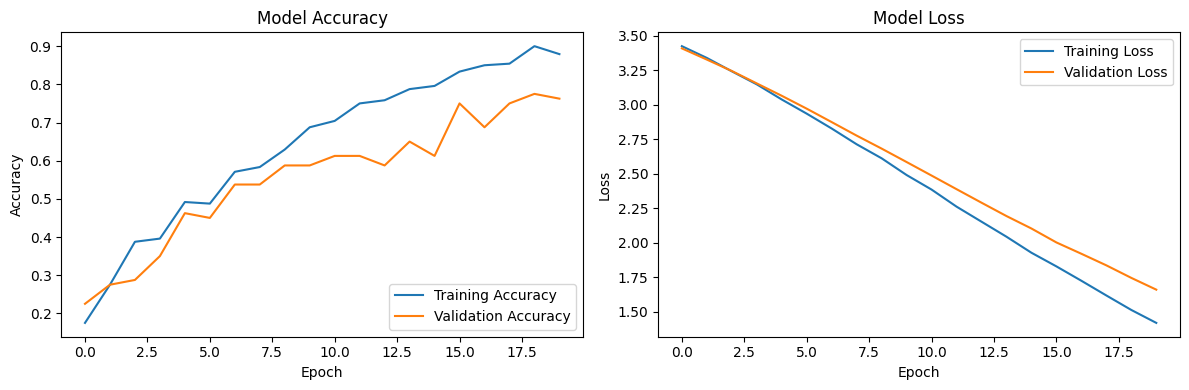

In [21]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()